# Advance House Price Prediction Model Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
#from feature selection
important_features = ['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'BsmtQual', 'BsmtExposure',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive']

In [4]:
#creating x_train, x_test, y_train and y_test
x_train = train_data[important_features]
x_test = test_data[important_features]
y_train = train_data[['SalePrice']]
y_test = test_data[['SalePrice']]

In [14]:
#training the model
lasso_regression = Lasso()
parameters = {'alpha' : [1e-20, 1e-15, 1e-10, 1e-9, 1e-8, 1e-7, 1e-4, 1e-3, 1e-2, 1e-1]}

model = GridSearchCV(lasso_regression, parameters, scoring='neg_mean_squared_error', cv=10)
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-20, 1e-15, 1e-10, 1e-09, 1e-08, 1e-07,
                                   0.0001, 0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error')

In [15]:
#best parameter
model.best_params_

{'alpha': 0.0001}

In [16]:
model.best_score_

-0.01792536932168419

In [17]:
#predicting the model
y_pred = model.predict(x_test)

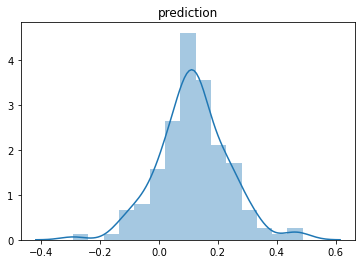

In [24]:
#ploting the prediction
y_pred = y_pred.reshape(146, 1)
sns.distplot(y_test - y_pred)
plt.title('prediction')
plt.show()

In [26]:
print(y_test)

     SalePrice
0    12.209188
1    11.798104
2    11.608236
3    12.165251
4    11.385092
..         ...
141  11.884489
142  12.287653
143  11.921718
144  11.598727
145  12.017331

[146 rows x 1 columns]


In [28]:
print(y_pred)

[[12.1262638 ]
 [11.88124259]
 [11.56237225]
 [12.15561306]
 [11.4094223 ]
 [11.41993967]
 [12.26287704]
 [11.62112978]
 [13.05581989]
 [11.83666823]
 [12.1200287 ]
 [11.85807072]
 [12.19088046]
 [11.57973367]
 [11.62198446]
 [11.74197111]
 [12.26908561]
 [11.56437451]
 [11.69634502]
 [12.08110674]
 [11.58367941]
 [11.77864434]
 [11.39602499]
 [11.94955463]
 [12.02065482]
 [12.06279998]
 [11.9433798 ]
 [11.25898165]
 [12.42512377]
 [11.52960652]
 [11.8992483 ]
 [12.15429607]
 [11.87269894]
 [12.50501919]
 [12.55230257]
 [12.0143235 ]
 [12.4083799 ]
 [11.60479676]
 [12.24248985]
 [12.60142716]
 [12.28792448]
 [11.69571266]
 [12.0914284 ]
 [12.53070989]
 [12.5920857 ]
 [11.67778206]
 [11.5612333 ]
 [11.67535708]
 [11.84736441]
 [11.47273759]
 [12.76724395]
 [11.76077121]
 [11.90424854]
 [11.24236735]
 [12.18744055]
 [11.53985272]
 [11.6551202 ]
 [12.26591643]
 [11.69243251]
 [11.32936641]
 [11.84643878]
 [11.59515643]
 [11.72313316]
 [11.87363356]
 [12.14708345]
 [11.86137893]
 [11.62773